### Analise do banco de dados IDEB

In [26]:
import pandas as pd
import numpy as np

In [27]:
f =pd.read_excel('divulgacao_anos_finais_municipios_2019.xlsx') 
df=f.replace("-", 0)

In [28]:
r_dff = df[df['Rede'] == 'Municipal']
r_dff.head()

,Sigla da UF,Nome do Município,Rede,IDEB 2005,IDEB 2007,IDEB 2009,IDEB 2011,IDEB 2013,IDEB 2015,IDEB 2017,IDEB 2019
1,RO,Alta Floresta D'Oeste,Municipal,3.2,0.0,0.0,0.0,0.0,0.0,4.3,4.6
4,RO,Ariquemes,Municipal,3.3,3.3,3.5,3.9,4.0,4.6,4.7,4.4
9,RO,Cacoal,Municipal,3.5,3.9,3.4,4.7,4.2,4.5,4.5,4.3
12,RO,Cerejeiras,Municipal,0.0,3.7,0.0,4.1,3.5,0.0,0.0,0.0
15,RO,Colorado do Oeste,Municipal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
r_df = r_dff.drop_duplicates(['Nome do Município'],keep= 'last')

In [30]:
####################################################################
# O estado a ser estudado pode ser escolhido pela variavel a seguir:

estado = 'CE'

####################################################################

r_df_estado = r_df[r_df['Sigla da UF'] == estado]

r_df_estado.head()

,Sigla da UF,Nome do Município,Rede,IDEB 2005,IDEB 2007,IDEB 2009,IDEB 2011,IDEB 2013,IDEB 2015,IDEB 2017,IDEB 2019
2350,CE,Abaiara,Municipal,3.4,3.2,5.8,4.3,4.4,4.1,4.5,4.5
2353,CE,Acarape,Municipal,2.6,3.3,3.5,2.9,3.4,3.9,4.7,4.9
2356,CE,Acaraú,Municipal,3.2,3.4,3.6,4.1,4.2,4.5,5.1,5.3
2359,CE,Acopiara,Municipal,3.0,3.5,4.0,4.1,4.3,5.4,5.2,5.5
2362,CE,Aiuaba,Municipal,2.2,4.1,4.5,4.8,4.4,4.8,4.8,5.5


In [31]:
column = r_df_estado["IDEB 2019"]
max_value = column.max()
print (max_value)

7.8


### Analise da lista de municipios do Ceara da CACTUS

In [32]:
lista_estados_CE = [
'Aquiraz','Eusébio','Acarau','Jijoca de Jericoacoara','Guaraciaba do Norte','Ubajara','Meruoca','Moraújo','Pires Ferreira','Reriutaba','Carnaubal','Capistrano','Itapiuna','Redenção','Morada Nova','Palhano','Erere','Jaguaribe','Pereiro','Boa Viagem','Ibicuitinga','Madalena','Quixeramobim','Ararenda','Catunda','Crateus','Ipaporanga','Ipueiras','Nova Russas','Milha,Solonopole','Tauá']

In [33]:
r= r_df[r_df['Sigla da UF'] == 'CE']

In [34]:
r_df_estado_CE  = r.rename(columns={'Nome do Município': 'nome'})

In [35]:
r_df_estado_CE[r_df_estado_CE.nome.isin(lista_estados_CE )].head()

,Sigla da UF,nome,Rede,IDEB 2005,IDEB 2007,IDEB 2009,IDEB 2011,IDEB 2013,IDEB 2015,IDEB 2017,IDEB 2019
2381,CE,Aquiraz,Municipal,2.5,2.9,3.7,4.2,4.8,4.7,4.3,5.1
2428,CE,Boa Viagem,Municipal,2.9,0.0,3.5,3.8,4.0,4.3,4.8,4.8
2442,CE,Capistrano,Municipal,2.9,3.0,3.5,3.3,3.3,4.2,4.4,4.7
2457,CE,Carnaubal,Municipal,3.2,3.2,3.2,3.6,4.6,5.2,4.8,5.2
2465,CE,Catunda,Municipal,3.0,3.1,3.2,3.4,3.6,4.1,5.8,6.9


In [36]:
r_df_estado_CE.mean(axis=0)


IDEB 2005\n    2.659302
IDEB 2007      3.071512
IDEB 2009      3.533721
IDEB 2011      3.780814
IDEB 2013      4.137209
IDEB 2015      4.501744
IDEB 2017      4.902326
IDEB 2019      5.236047
dtype: float64

Considerando a média dos municípios do Ceará que já aceitaram a CACTUS, podemos propor que os próximos municípios tenham o IDEB de 2019 maior que 5

### Filtro dos municípios com IDEB 2019 maior que 5

In [37]:
r_df_escolhidos = r_df[r_df['IDEB 2019'] > 5]
r_df_escolhidos.head()

,Sigla da UF,Nome do Município,Rede,IDEB 2005,IDEB 2007,IDEB 2009,IDEB 2011,IDEB 2013,IDEB 2015,IDEB 2017,IDEB 2019
38,RO,Nova Brasilândia D'Oeste,Municipal,0.0,3.6,3.2,3.7,4.5,5.1,5.6,5.7
108,RO,Ministro Andreazza,Municipal,3.5,3.2,3.8,4.0,4.6,4.9,5.5,5.2
247,AM,Boca do Acre,Municipal,3.8,4.5,4.6,5.2,4.7,5.2,4.9,5.3
484,PA,Benevides,Municipal,0.0,0.0,0.0,0.0,0.0,0.0,5.1,5.3
762,PA,Vitória do Xingu,Municipal,3.4,3.5,4.1,3.8,4.1,4.0,4.2,5.2


In [38]:
df_histo = r_df_escolhidos['Sigla da UF'].value_counts()

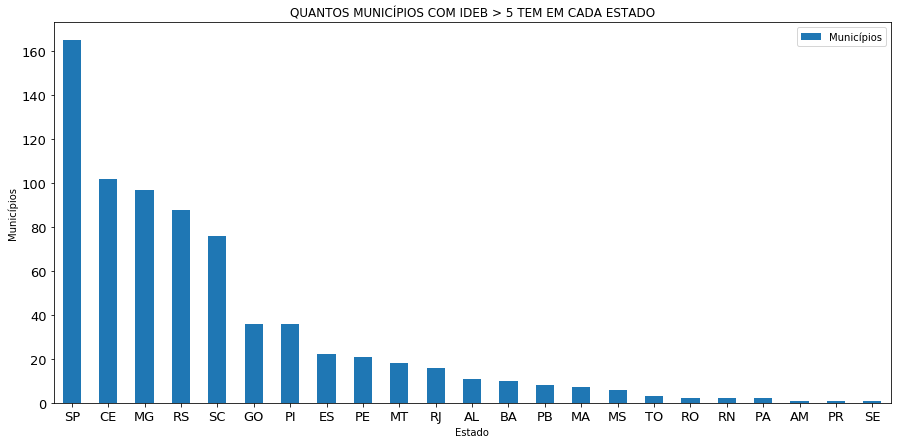

In [60]:
df_historr = df_histo.reset_index() 
df_histor= df_historr.rename(columns={'index': 'Estado'})
df_histograma= df_histor.rename(columns={'Sigla da UF': 'Municípios'})
coisa = df_histograma.set_index('Estado').plot(kind='bar',rot=(0),fontsize = (13),use_index=True,title='QUANTOS MUNICÍPIOS COM IDEB > 5 TEM EM CADA ESTADO', figsize=(15,7)).set_ylabel("Municípios").get_figure().savefig('output.png')
coisa

### Implementação do banco de dados com população por município

In [40]:
pop_muni = pd.read_csv ('populacao_municipio.csv')

In [41]:
lista_escolhidos =r_df_escolhidos["Nome do Município"].tolist()


In [42]:
pop_muni_sel = pop_muni[pop_muni.Município.isin(lista_escolhidos)]


In [43]:
pop_muni_sel_index=pop_muni_sel.set_index('Município')


In [44]:
r_df_escolhidos_index=r_df_escolhidos.set_index('Nome do Município')


In [45]:
municipios_com_pop = r_df_escolhidos_index.join(pop_muni_sel_index).fillna(0)
municipios_com_pop.head()

,Sigla da UF,Rede,IDEB 2005,IDEB 2007,IDEB 2009,IDEB 2011,IDEB 2013,IDEB 2015,IDEB 2017,IDEB 2019,Sigla,Código,2010
Abelardo Luz,SC,Municipal,4.0,5.4,4.8,4.8,4.3,5.7,5.1,5.1,SC,4200101.0,17100.0
Acaraú,CE,Municipal,3.2,3.4,3.6,4.1,4.2,4.5,5.1,5.3,CE,2300200.0,57551.0
Aceguá,RS,Municipal,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.1,RS,4300034.0,4394.0
Acopiara,CE,Municipal,3.0,3.5,4.0,4.1,4.3,5.4,5.2,5.5,CE,2300309.0,51160.0
Afogados da Ingazeira,PE,Municipal,2.6,2.9,4.1,3.9,4.4,4.8,5.3,5.4,PE,2600104.0,35088.0


### Analise da lista de municipios do Ceara da CACTUS


In [46]:
#lista_estados_CE

In [47]:
municipios_com_pop_CE = municipios_com_pop[municipios_com_pop.index.isin(lista_estados_CE)]
municipios_com_pop_CE.head()

,Sigla da UF,Rede,IDEB 2005,IDEB 2007,IDEB 2009,IDEB 2011,IDEB 2013,IDEB 2015,IDEB 2017,IDEB 2019,Sigla,Código,2010
Aquiraz,CE,Municipal,2.5,2.9,3.7,4.2,4.8,4.7,4.3,5.1,CE,2301000.0,72628.0
Carnaubal,CE,Municipal,3.2,3.2,3.2,3.6,4.6,5.2,4.8,5.2,CE,2303402.0,16746.0
Catunda,CE,Municipal,3.0,3.1,3.2,3.4,3.6,4.1,5.8,6.9,CE,2303659.0,9952.0
Eusébio,CE,Municipal,3.9,3.8,4.3,4.6,4.6,4.9,5.2,5.3,CE,2304285.0,46033.0
Guaraciaba do Norte,CE,Municipal,3.1,3.5,3.5,3.7,4.7,4.4,4.8,5.2,CE,2305001.0,37775.0


In [48]:
municipios_com_pop_CE.mean(axis=0)

IDEB 2005\n    2.861905e+00
IDEB 2007      3.314286e+00
IDEB 2009      3.714286e+00
IDEB 2011      4.066667e+00
IDEB 2013      4.361905e+00
IDEB 2015      4.790476e+00
IDEB 2017      5.123810e+00
IDEB 2019      5.619048e+00
Código         2.241120e+06
2010           3.036105e+04
dtype: float64

Podemos observar que a media de habitantes que abraca a CACTUS e de29386.680. Portanto podemos filtrar os municipios para que eles sejam menores que 50.000

### Filtro dos estados com IDEB 2019 ACIMA DE 5 E numero de habitantes menor que 100.000


In [49]:
municipios_com_pop_filtrado = municipios_com_pop[(municipios_com_pop['2010'] > 10000) & (municipios_com_pop['2010'] < 100000)]
municipios_com_pop_filtrado.head()

,Sigla da UF,Rede,IDEB 2005,IDEB 2007,IDEB 2009,IDEB 2011,IDEB 2013,IDEB 2015,IDEB 2017,IDEB 2019,Sigla,Código,2010
Abelardo Luz,SC,Municipal,4.0,5.4,4.8,4.8,4.3,5.7,5.1,5.1,SC,4200101.0,17100.0
Acaraú,CE,Municipal,3.2,3.4,3.6,4.1,4.2,4.5,5.1,5.3,CE,2300200.0,57551.0
Acopiara,CE,Municipal,3.0,3.5,4.0,4.1,4.3,5.4,5.2,5.5,CE,2300309.0,51160.0
Afogados da Ingazeira,PE,Municipal,2.6,2.9,4.1,3.9,4.4,4.8,5.3,5.4,PE,2600104.0,35088.0
Aguaí,SP,Municipal,0.0,0.0,3.8,4.0,4.2,4.2,4.9,5.9,SP,3500303.0,32148.0


In [50]:
df_histo_final = municipios_com_pop_filtrado['Sigla da UF'].value_counts()
df_histo_final.head()

SP    93
CE    85
SC    49
RS    49
MG    48
Name: Sigla da UF, dtype: int64

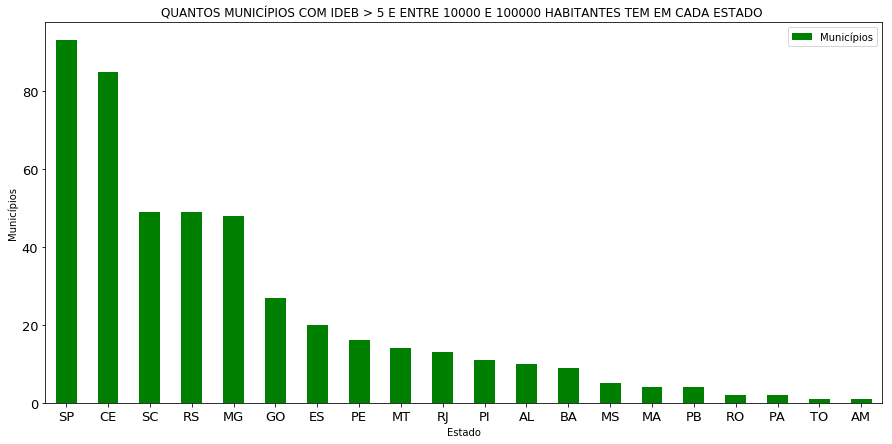

In [59]:
df_historr = df_histo_final.reset_index() 
df_histor= df_historr.rename(columns={'index': 'Estado'})
df_histograma= df_histor.rename(columns={'Sigla da UF': 'Municípios'})
df_histograma.set_index('Estado').plot(kind='bar',color = 'green',rot=(0),fontsize = (13),use_index=True,title='QUANTOS MUNICÍPIOS COM IDEB > 5 E ENTRE 10000 E 100000 HABITANTES TEM EM CADA ESTADO ', figsize=(15,7)).set_ylabel("Municípios").get_figure().savefig('outpuyt.png')